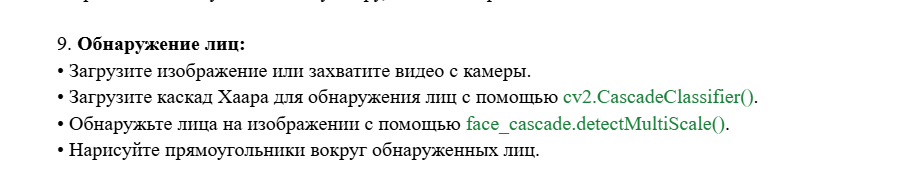

## 1. **Face Detection on an Image**
In this first step, we'll automatically find faces in photos using **OpenCV's Haar Cascade method**.  Here's what we'll do:





1.   Load an image into our program
2.   Use a special pre-trained tool to scan for faces
3.   Draw boxes around any faces we find
4.   Show the final result with all detected faces marked

**Images used in this experiment**:
*Image 4 & Image 5*

This face detection helps us:
*   Quickly locate faces in any picture
*   See how well the computer can recognize human faces
*   Prepare for more complex tasks like video face detection

The red rectangles will clearly show us where the system finds faces in each image!

Please select the first image :


Saving image 5.jpg to image 5.jpg

Please select the second image :


Saving image colab 4.png to image colab 4.png


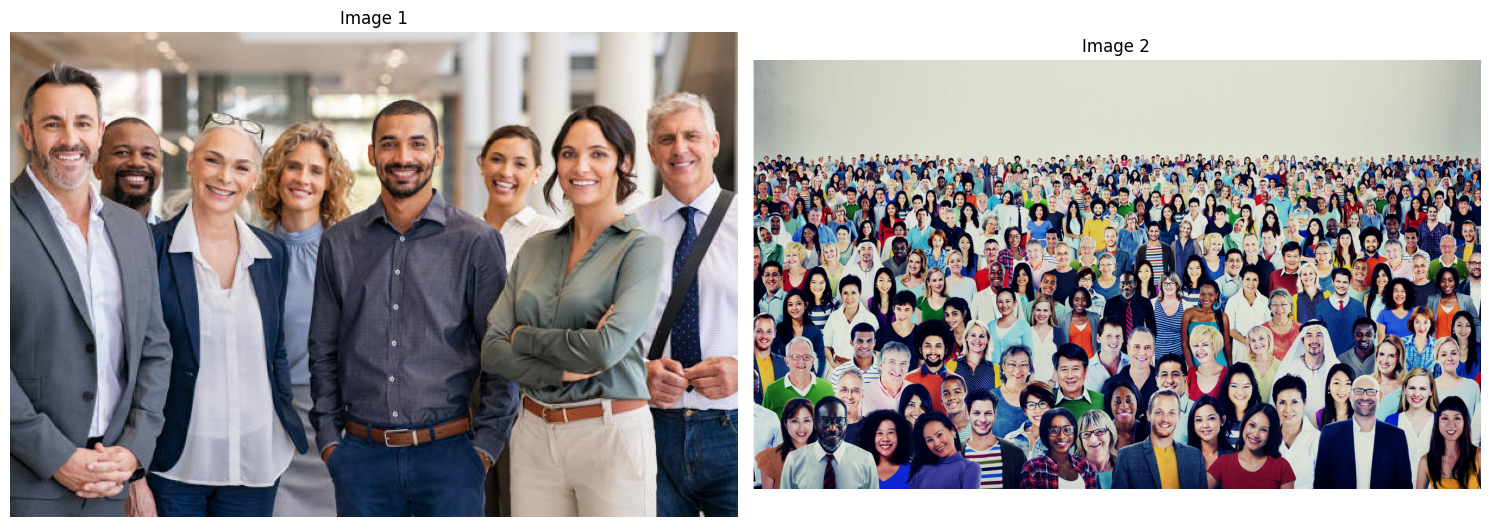

In [1]:
import cv2
import matplotlib.pyplot as plt
from google.colab import files
import numpy as np

# Upload 2 images
print("Please select the first image :")
uploaded1 = files.upload()
filename1 = list(uploaded1.keys())[0]

print("\nPlease select the second image :")
uploaded2 = files.upload()
filename2 = list(uploaded2.keys())[0]

# Read images
image1 = cv2.imread(filename1)
image2 = cv2.imread(filename2)

# Convert BGR to RGB
image1_rgb = cv2.cvtColor(image1, cv2.COLOR_BGR2RGB)
image2_rgb = cv2.cvtColor(image2, cv2.COLOR_BGR2RGB)

# Create subplots
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(15, 7))

# Display images
ax1.imshow(image1_rgb)
ax1.set_title('Image 1')
ax1.axis('off')

ax2.imshow(image2_rgb)
ax2.set_title('Image 2')
ax2.axis('off')

plt.tight_layout()
plt.show()

 ## *Step 2* ___ Load **the Haar Cascade Classifier** and Face Detection

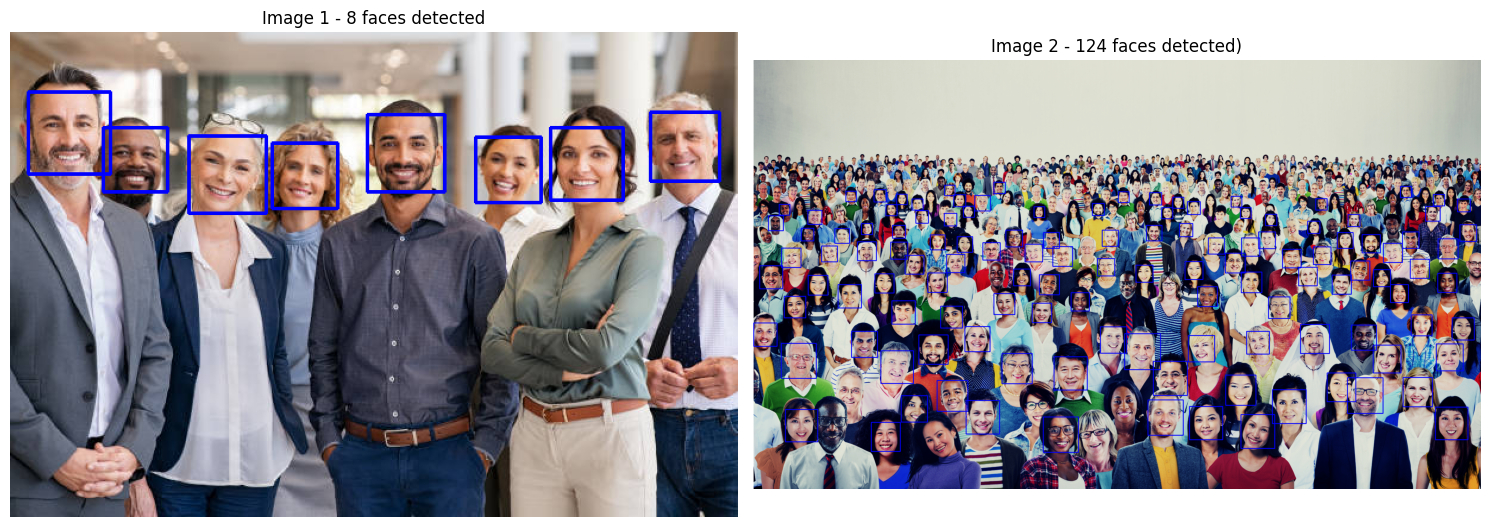

In [2]:
import cv2
import matplotlib.pyplot as plt
import numpy as np

# Load the face classifier
face_cascade = cv2.CascadeClassifier(cv2.data.haarcascades + 'haarcascade_frontalface_default.xml')

def detect_and_draw_faces(img_path):
    """Loads an image, detects faces and draws rectangles"""
    # Reading the image
    img = cv2.imread(img_path)
    if img is None:
        print(f"Error: Unable to load image {img_path}")
        return None, 0

    # Convert to grayscale
    gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)

    # Face detection with optimized parameters
    faces = face_cascade.detectMultiScale(
        gray,
        scaleFactor=1.1,
        minNeighbors=10,
        minSize=(30, 30),
        flags=cv2.CASCADE_SCALE_IMAGE
    )

    # Draw the rectangles around the faces
    for (x, y, w, h) in faces:
        cv2.rectangle(img, (x, y), (x+w, y+h), (255, 0, 0), 2)

    # Convert to RGB for display
    img_rgb = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)

    return img_rgb, len(faces)

# Processing the two images
img1, count1 = detect_and_draw_faces(filename1)
img2, count2 = detect_and_draw_faces(filename2)

# Creating the figure with subgraphs
plt.figure(figsize=(15, 7))

# Displaying the first image
plt.subplot(1, 2, 1)
plt.imshow(img1)
plt.title(f'Image 1 - {count1} faces detected')
plt.axis('off')

# Displaying the second image
plt.subplot(1, 2, 2)
plt.imshow(img2)
plt.title(f'Image 2 - {count2} faces detected)')
plt.axis('off')

# Spacing adjustment
plt.tight_layout()
plt.show()

## **2. Face Detection in Video**
After successfully detecting faces in images, we'll now apply this technique to video. Here's how it works:



1.   We take the video and break it down into individual frames (pictures)
2.   We scan each frame to find any faces
3.   When we find faces, we draw rectangles around them
4.   Finally, we show the video with all the detected faces highlighted

Video used in this demo:
"Squeezie sort avec Lena Situation"

This process lets us:

*   Track faces throughout a video
*   See how face detection works in real-world situations
*   Understand how computers recognize faces in motion

The rectangles will help us clearly see which faces the system is detecting in each frame!

Detection stopped by user
Last frame processed :


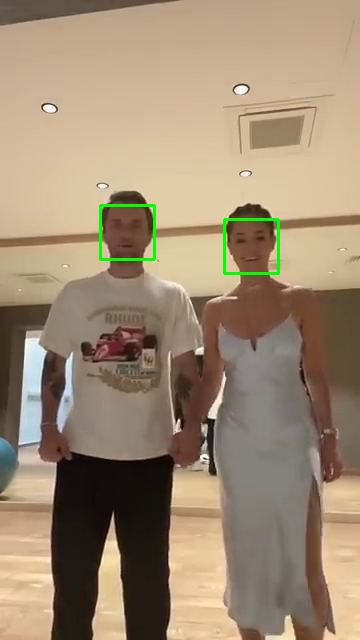

Processing Complete - Resources Released


In [4]:
import cv2
from google.colab.patches import cv2_imshow
from google.colab import files
import numpy as np
import IPython
import time

# 1. Upload the video
print("1. Upload the video (max 100MB)")
uploaded = files.upload()
video_name = next(iter(uploaded))

# 2. Initialisation
face_cascade = cv2.CascadeClassifier(cv2.data.haarcascades + 'haarcascade_frontalface_default.xml')
cap = cv2.VideoCapture(video_name)

# 4. Frame by frame processing
try:
    while cap.isOpened():
        ret, frame = cap.read()
        if not ret:
            break

        # Face Detection
        gray = cv2.cvtColor(frame, cv2.COLOR_BGR2GRAY)
        faces = face_cascade.detectMultiScale(gray, 1.1, 5, minSize=(50,50))

        for (x,y,w,h) in faces:
            cv2.rectangle(frame, (x,y), (x+w,y+h), (0,255,0), 2)
            last_frame = frame.copy()
            cv2_imshow(frame)
            IPython.display.clear_output(wait=True)

        # Drawing rectangles
        for (x,y,w,h) in faces:
            cv2.rectangle(frame, (x,y), (x+w,y+h), (0,255,0), 2)

        # Display
        cv2_imshow(frame)
        IPython.display.clear_output(wait=True)

        # waitKey
        time.sleep(0.02)

except KeyboardInterrupt:
    print("Detection stopped by user")
finally:
    cap.release()
    if last_frame is not None:
        print("Last frame processed :")
        cv2_imshow(last_frame)  # Displays the last frame
    print("Processing Complete - Resources Released")

 ## 3. **Face Detection in a Video (Frame by Frame)**
In this step, we detect faces in every frame of a video. The process works like this:
1. The video is split into individual images (frames)
2. We check each frame for faces using face detection.
3. Every time a face is found, we save that frame as a separate picture.

Video used in this experiment:
"Denzel Washington Partage Son Meilleur Conseil Pour Réussir"

This method helps us:
*   Track faces in videos
*   Save important moments
*   Analyze facial expressions over time






Now, let’s see how it works!

In [ ]:
import cv2
from google.colab.patches import cv2_imshow
from google.colab import files
import time

# 1. Upload the video
print("1. Upload the video (max 100MB)")
uploaded = files.upload()
video_name = next(iter(uploaded))

# 2. Load Haar Cascade and check
face_cascade = cv2.CascadeClassifier(cv2.data.haarcascades + 'haarcascade_frontalface_default.xml')
if face_cascade.empty():
    raise IOError("Failed to load Haar Cascade XML file.")

# 3. Open video file
cap = cv2.VideoCapture(video_name)
if not cap.isOpened():
    raise IOError("Cannot open video file.")

# 4. Process frames
try:
    while True:
        ret, frame = cap.read()
        if not ret:
            break

        # Convert to grayscale for face detection
        gray = cv2.cvtColor(frame, cv2.COLOR_BGR2GRAY)

        # Detect faces
        faces = face_cascade.detectMultiScale(
            gray,
            scaleFactor=1.1,
            minNeighbors=5,
            minSize=(50, 50)
        )

        # Draw rectangles around detected faces
        for (x, y, w, h) in faces:
            cv2.rectangle(frame, (x, y), (x + w, y + h), (0, 255, 0), 2)

        # Display the frame
        cv2_imshow(frame)
        # add a short pause to control playback speed
        time.sleep(0.02)

except KeyboardInterrupt:
    print("Detection stopped by user.")

finally:
    cap.release()
    print("Processing complete - Resources released.")


Output hidden; open in https://colab.research.google.com to view.